Task 4 - Investigation of Natural Samples

In [72]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import utils
import importlib
import json
from tabulate import tabulate
#from adjustText import adjust_text
importlib.reload(utils)
pd.set_option('display.max_rows', None)

Samples used for task 4:
1. Autunite
2. Filter dust
3. Soil sample

In [2]:
#Define the file paths
file_path_autunite = r'Data\Task 4\autunite.TKA'
file_path_filter = r'Data\Task 4\filter dirt.TKA'
file_path_soil = r'Data\Task 4\soil.TKA'

file_paths = [file_path_autunite, file_path_filter, file_path_soil]

#file path for background data
file_path_background = r'Data\Task 3\background 8.0 uS.TKA'

In [3]:
#import the background data
background_df = {}

background_df, total_time_background = utils.load_data(file_path_background)
print('Background Data succesfully imported.')

#Create a dictionary for the object data
object_dict = {}
#Load the data
for file_path in file_paths:
    #Load the data from the file path
    data, total_time = utils.load_data(file_path)

    #Get the name of the element from the file path
    object_name = file_path.split('\\')[-1].split('.')[0].strip().capitalize()
    object_dict[object_name] = data
    
    #Create the Normalized Counts per Second with the background spectrum subtracted, and clip it so there are no negative numbers
    object_dict[object_name]['Normalized Counts per Second'] = object_dict[object_name]['Counts per Second'] - background_df['Counts per Second']
    object_dict[object_name]['Normalized Counts per Second'] = object_dict[object_name]['Normalized Counts per Second'].clip(lower=1e-6)
    # for i in range(0, len(object_dict[object_name])):
    #     print(f"Subracting {object_dict[object_name].loc[i, 'Counts per Second']} - {background_df.loc[i, 'Counts per Second']}")
    # Identify rows where clipping occurred
    clipped_rows = object_dict[object_name][
    (object_dict[object_name]['Counts per Second'] - background_df['Counts per Second']) < 1e-6
]

    # Print the clipped rows
    if not clipped_rows.empty:
        print(f"Clipped entries for {object_name}:")
        print(clipped_rows)
        print(f'Data imported successfully for {object_name}.')

### For debugging ###
#print(object_dict)
#print(background_df)
#print(background_df.dtypes)
type(background_df)

Background Data succesfully imported.
Clipped entries for Autunite:
      Channel  Counts per Second  Counts  Normalized Counts per Second
0           1           0.000000       0                      0.000001
1           2           0.000000       0                      0.000001
2           3           0.000000       0                      0.000001
1093     1094           0.016667      10                      0.000001
1336     1337           0.010000       6                      0.000001
1607     1608           0.011667       7                      0.000001
1784     1785           0.033333      20                      0.000001
1800     1801           0.003333       2                      0.000001
1815     1816           0.010000       6                      0.000001
1884     1885           0.005000       3                      0.000001
1904     1905           0.005000       3                      0.000001
1959     1960           0.003333       2                      0.000001
1964     

pandas.core.frame.DataFrame

In [4]:
#Convert data to desired
#Channels > Energy (keV)
#Counts > Counts per Second
   
calibration_file_path = r'Data\calibration_data.json'
with open(calibration_file_path, 'r') as json_file:
    calibration_data = json.load(json_file)
slope = calibration_data['slope']
intercept = calibration_data['intercept']

def channel_to_energy(channel, slope=slope, intercept=intercept):
    return slope * channel + intercept

for object_name, data in object_dict.items():
    data['Energy (keV)'] = channel_to_energy(data['Channel'])

    ### For debugging ###
    print(f'Data for {object_name}')
    print(data.head())
    print('=' * 50)



Data for Autunite
   Channel  Counts per Second  Counts  Normalized Counts per Second  \
0        1           0.000000       0                      0.000001   
1        2           0.000000       0                      0.000001   
2        3           0.000000       0                      0.000001   
3        4           0.001667       1                      0.001111   
4        5           0.008333       5                      0.008333   

   Energy (keV)  
0      0.561216  
1      0.887758  
2      1.214301  
3      1.540843  
4      1.867386  
Data for Filter dirt
   Channel  Counts per Second  Counts  Normalized Counts per Second  \
0        1                0.0       0                      0.000001   
1        2                0.0       0                      0.000001   
2        3                0.0       0                      0.000001   
3        4                0.0       0                      0.000001   
4        5                0.0       0                      0.000001   


C:\Users\kearb\AppData\Local\Temp\ipykernel_51088\997719888.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


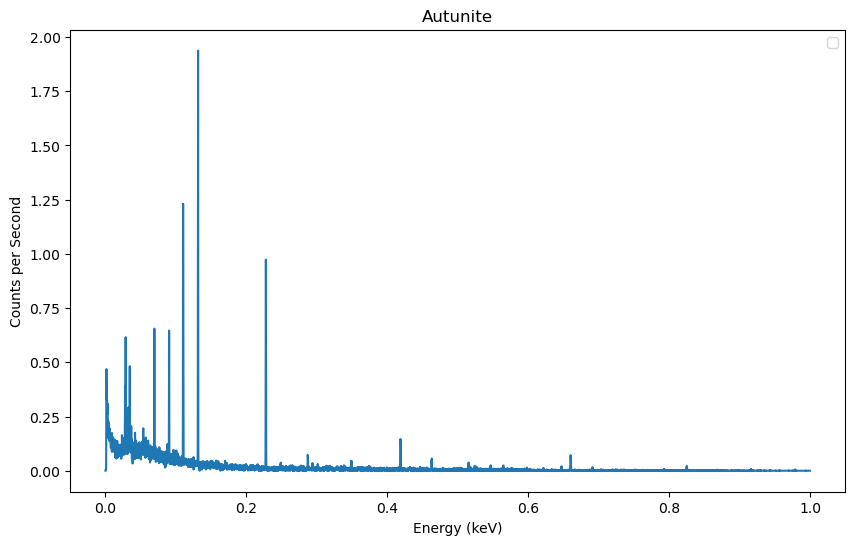

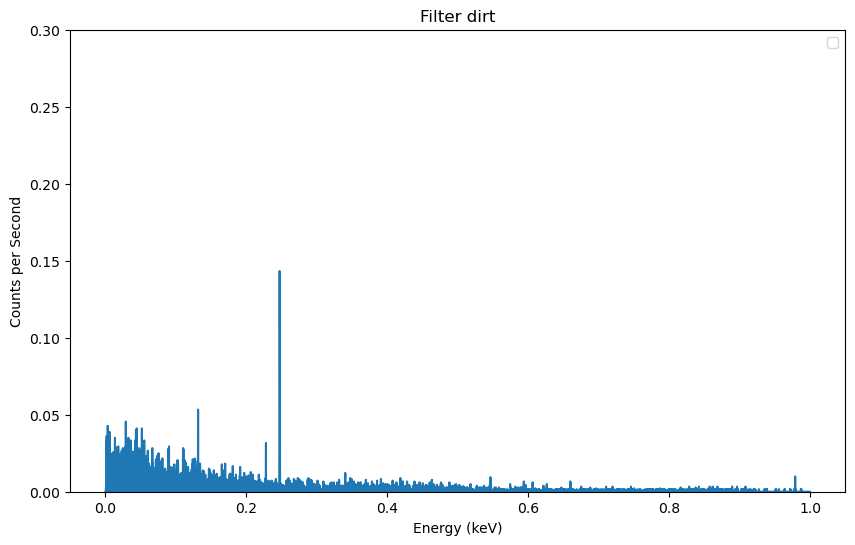

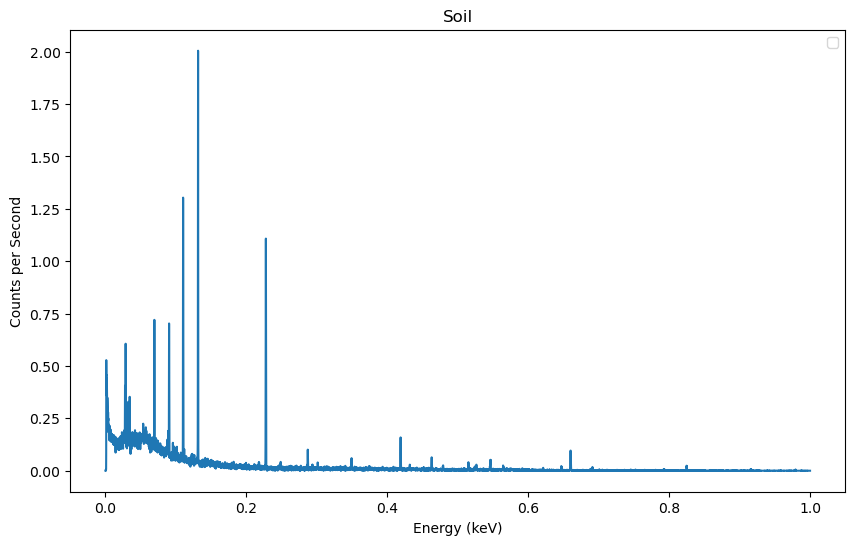

In [5]:
#Preliminary plots for visual data inspection
for object_name, data in object_dict.items():
    plt.figure(figsize=(10,6))
    plt.plot(data['Energy (keV)']/data['Energy (keV)'].max(), data['Normalized Counts per Second'])
    plt.xlabel('Energy (keV)')
    plt.ylabel('Counts per Second')
    if object_name == 'Filter dirt':
        plt.ylim(bottom=0, top=0.3)
    plt.title(object_name)
    plt.legend()
    plt.show()
    plt.close()

In [6]:
#Load background data for superimposed plot
background_dict = {}

#Import the data for the background spectrum
file_path = r'Data\Task 3\background 8.0 uS.TKA'
background_dict, total_time = utils.load_data(file_path)

#Conversions for dataframe
#Channels > energy
#Counts > counts per second
calibration_file_path = r'Data\calibration_data.json'
with open(calibration_file_path, 'r') as json_file:
    calibration_data = json.load(json_file)
slope = calibration_data['slope']
intercept = calibration_data['intercept']

def channel_to_energy(channel, slope=slope, intercept=intercept):
    return slope * channel + intercept

background_dict['Energy (keV)'] = channel_to_energy(background_dict['Channel'])

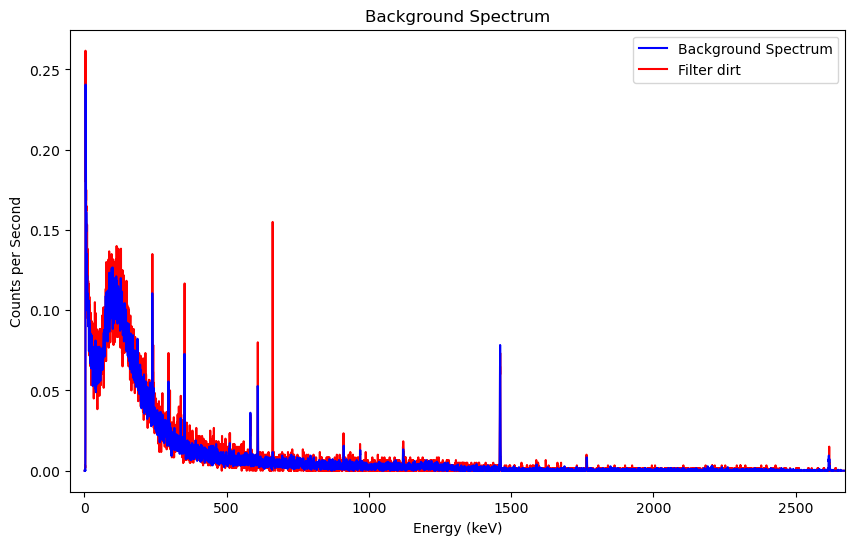

In [7]:
#Create a plot of the background spectrum and filter spectrum superimposed
plt.figure(figsize=(10, 6))
plt.plot(background_dict['Energy (keV)'], background_dict['Counts per Second'], label='Background Spectrum', color='blue', zorder=2)
plt.title('Background Spectrum')
plt.plot(object_dict['Filter dirt']['Energy (keV)'], object_dict['Filter dirt']['Counts per Second'], label='Filter dirt', color='red', zorder=1)
plt.xlabel('Energy (keV)')
plt.ylabel('Counts per Second')
#plt.ylim(bottom=0, top=2.0)
plt.legend()
#plt.grid()
plt.xlim(left=-50, right=background_dict['Energy (keV)'].max())

plt.show()

In [8]:
#Create the peaks_dict
peaks_dict = {}

#Call the peak_finder_simple function
for object_name, data in object_dict.items():
    peaks_dict = utils.find_peaks_simple(data=object_dict, start_channel=25, channel_step=50, cutoff_value = 0.1, threshold_factor=2)

#peaks_dict = utils.find_peaks_simple(data={'Background': background_dict}, start_channel=5, channel_step=25, cutoff_value = 0.013, threshold_factor=2)


Data type: <class 'dict'>
Data keys: dict_keys(['Autunite', 'Filter dirt', 'Soil'])
Peak found for Autunite at channel 235 with value 0.725 (Max: 0.725, Avg: 0.2779333333333333)
Peak found for Autunite at channel 283 with value 0.5966666666666667 (Max: 0.5966666666666667, Avg: 0.2588333333333333)
Peak found for Autunite at channel 569 with value 0.7283333333333334 (Max: 0.7283333333333334, Avg: 0.17693333333333336)
Peak found for Autunite at channel 740 with value 0.6966666666666667 (Max: 0.6966666666666667, Avg: 0.1432)
Peak found for Autunite at channel 903 with value 1.2866666666666666 (Max: 1.2866666666666666, Avg: 0.14486666666666664)
Peak found for Autunite at channel 1077 with value 2.0 (Max: 2.0, Avg: 0.1506)
Peak found for Autunite at channel 1865 with value 1.0233333333333334 (Max: 1.0233333333333334, Avg: 0.10579999999999998)
Peak found for Autunite at channel 3430 with value 0.155 (Max: 0.155, Avg: 0.024333333333333335)
Peaks for Autunite:
      Channel  Counts per Second
2

In [9]:
#To find the rogue Filter dirt peak, because I'm running out of patience

# Slice the 'Filter dirt' DataFrame for the specified energy range
filter_dirt_data = object_dict['Filter dirt']
energy_slice = filter_dirt_data[(filter_dirt_data['Energy (keV)'] >= 600) & (filter_dirt_data['Energy (keV)'] <= 650)]

# Find the row with the maximum 'Counts per Second'
max_row = energy_slice.loc[energy_slice['Normalized Counts per Second'].idxmax()]
max_counts_per_second = max_row['Normalized Counts per Second']
# Get the corresponding energy value
max_energy = max_row['Energy (keV)']

print(f"The energy value corresponding to the maximum count is: {max_energy} keV\n The CpS value is {max_counts_per_second}")

The energy value corresponding to the maximum count is: 609.5629876148801 keV
 The CpS value is 0.03166666666666666


In [10]:
# Step 1: Filter out rows with low y-values
peaks_dict["Filter dirt"] = peaks_dict["Filter dirt"][
    peaks_dict["Filter dirt"]["Normalized Counts per Second"] >= 0.05
]

peaks_dict["Filter dirt"] = pd.concat([
    peaks_dict["Filter dirt"],
    pd.DataFrame([max_row])  # wrap in list to create single-row DataFrame
], ignore_index=True)

C:\Users\kearb\AppData\Local\Temp\ipykernel_51088\1092163420.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


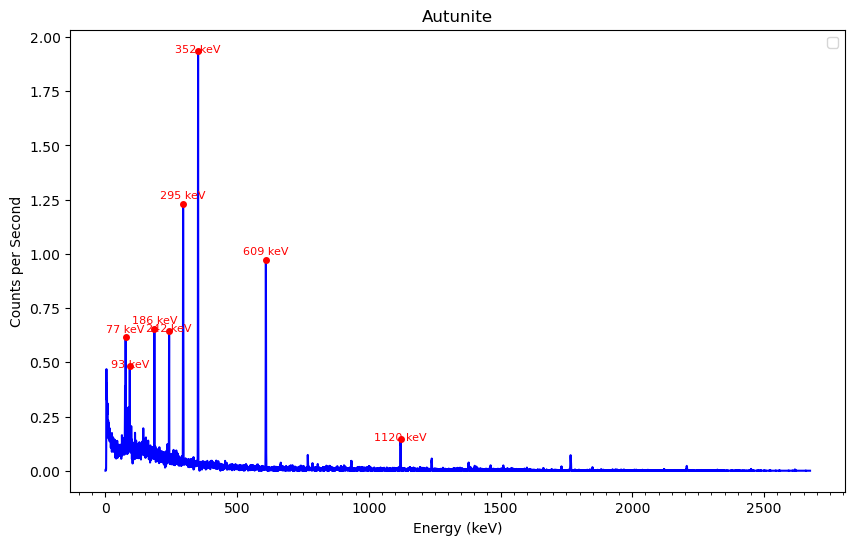

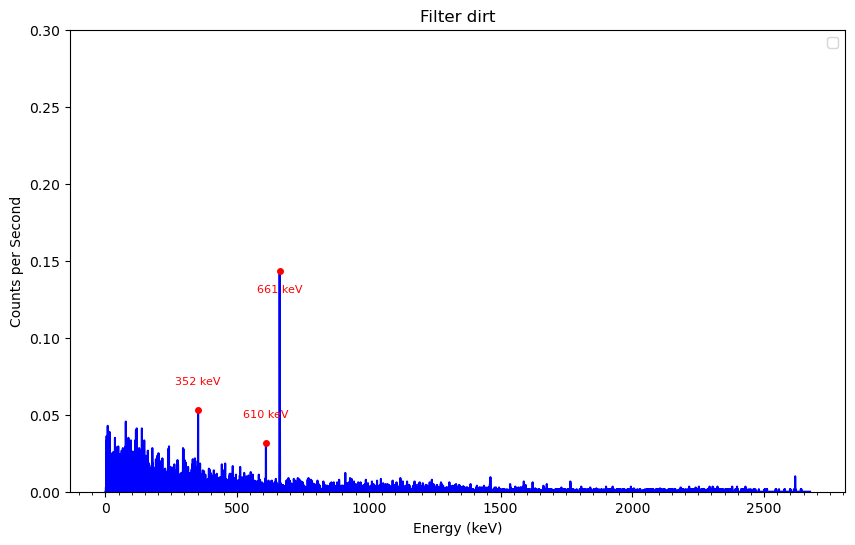

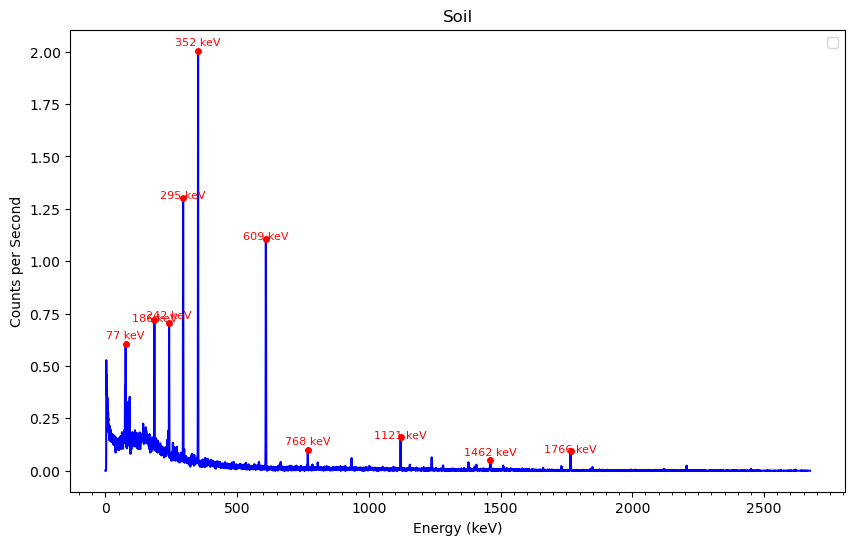

In [11]:
#Replot the data with the peaks



for object_name, data in object_dict.items():
    #First, extract the peak data
    peak_energies = peaks_dict[object_name]['Energy (keV)'].to_numpy()
    peak_counts = peaks_dict[object_name]['Normalized Counts per Second'].to_numpy()

    #convert peak channel to peak_energy

    #Create the plots
    plt.figure(figsize=(10,6))
    plt.plot(data['Energy (keV)'], data['Normalized Counts per Second'], color='blue')
    for i, (x, y) in enumerate(zip(peak_energies, peak_counts)):
        if y > 0.00:  # Only label significant peaks
            x_rounded = round(x, 0)
            offset = 0.015 if i % 2 == 0 else -0.015  # Alternate label positions
            plt.text(x, y + offset, f"{int(x_rounded)} keV", fontsize=8, ha='center', va='bottom', color='red')
            plt.plot(x, y, 'ro', markersize=4)
    # for x, y in zip(peak_energies, peak_counts):
    #     x_rounded = round(x, 0)
    #     if x_rounded == 186:
    #         plt.text(x, y+.015, f"{int(x_rounded)} keV", fontsize=8, ha='center', va='top', color='red', zorder=1)    
    #     else:
    #         if x_rounded == 242:
    #             plt.text(x, y-0.015, f"{int(x_rounded)} keV", fontsize=8, ha='center', va='bottom', color='red', zorder=1)
    #         else:
    #             plt.text(x, y+.005, f"{int(x_rounded)} keV", fontsize=8, ha='center', va='bottom', color='red', zorder=1)
    plt.xlabel('Energy (keV)')
    plt.ylabel('Counts per Second')
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(500))
    plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(50))
    if object_name == 'Filter dirt':
        plt.ylim(bottom=0, top=0.3)
    plt.title(object_name)
    plt.legend()
    plt.show()
    plt.close()


# Creating the plots with the arrows and such

In [70]:
# Manually interpret peaks and create dictionaries for the elements

autunite_peaks_dict = {
    r'Bi k$\alpha_1$': pd.DataFrame({'Energy (keV)': [77]}),
    '²³⁴Th': pd.DataFrame({'Energy (keV)': [93]}),
    '²²⁶Ra': pd.DataFrame({'Energy (keV)': [186]}),
    '²¹⁴Pb': pd.DataFrame({'Energy (keV)': [242, 295, 352]}),
    '²¹⁴Bi': pd.DataFrame({'Energy (keV)': [609, 1120]}),
}

filter_peaks_dict = {
    '²¹⁴Pb': pd.DataFrame({'Energy (keV)': [352]}),
    '²¹⁴Bi': pd.DataFrame({'Energy (keV)': [609]}),
    '¹³Cs' : pd.DataFrame({'Energy (keV)': [661]}),
}

soil_peaks_dict = {
    r'Bi k$\alpha_1$': pd.DataFrame({'Energy (keV)': [77]}),
    '²²⁶Ra': pd.DataFrame({'Energy (keV)': [186]}),
    '²¹⁴Pb': pd.DataFrame({'Energy (keV)': [242, 295, 352]}),
    '²¹⁴Bi': pd.DataFrame({'Energy (keV)': [609, 768, 1121, 1766]}),
    '⁴⁰K': pd.DataFrame({'Energy (keV)': [1462]})
}


In [ ]:
# def superscript_keys(peak_dict):
#     updated_dict = {}
#     for isotope, peaks in peak_dict.items():
#         digits = ''.join(filter(str.isdigit, isotope))
#         element = ''.join(filter(str.isalpha, isotope))
#         new_key = utils.to_superscript(digits) + element
#         updated_dict[new_key] = peaks
#     return updated_dict

# soil_peaks_dict = superscript_keys(soil_peaks_dict)
# filter_peaks_dict = superscript_keys(filter_peaks_dict)
# autunite_peaks_dict = superscript_keys(autunite_peaks_dict)

In [69]:
for isotope, peaks_df in autunite_peaks_dict.items():
    # Ensure DataFrame
    if not isinstance(peaks_df, pd.DataFrame):
        peaks_df = pd.DataFrame(peaks_df)
    
    cps_list = []
    for energy in peaks_df['Energy (keV)']:
        # Find all rows in object_df within ±25 keV
        mask = np.abs(object_df['Energy (keV)'] - energy) <= 25
        cps_in_window = object_df.loc[mask, 'Counts per Second']
        # Get max value or NaN if none found
        max_cps = cps_in_window.max() if not cps_in_window.empty else np.nan
        cps_list.append(max_cps)
    
    # Add new column
    peaks_df['Counts per Second'] = cps_list
    autunite_peaks_dict[isotope] = peaks_df

#For the filter dirt peaks

for isotope, peaks_df in filter_peaks_dict.items():
    # Ensure DataFrame
    if not isinstance(peaks_df, pd.DataFrame):
        peaks_df = pd.DataFrame(peaks_df)
    
    cps_list = []
    for energy in peaks_df['Energy (keV)']:
        # Find all rows in object_df within ±25 keV
        mask = np.abs(object_df['Energy (keV)'] - energy) <= 25
        cps_in_window = object_df.loc[mask, 'Counts per Second']
        # Get max value or NaN if none found
        max_cps = cps_in_window.max() if not cps_in_window.empty else np.nan
        cps_list.append(max_cps)
    
    # Add new column
    peaks_df['Counts per Second'] = cps_list
    filter_peaks_dict[isotope] = peaks_df
    
    
#For the soil peaks

for isotope, peaks_df in soil_peaks_dict.items():
    # Ensure DataFrame
    if not isinstance(peaks_df, pd.DataFrame):
        peaks_df = pd.DataFrame(peaks_df)
    
    cps_list = []
    for energy in peaks_df['Energy (keV)']:
        # Find all rows in object_df within ±25 keV
        mask = np.abs(object_df['Energy (keV)'] - energy) <= 25
        cps_in_window = object_df.loc[mask, 'Counts per Second']
        # Get max value or NaN if none found
        max_cps = cps_in_window.max() if not cps_in_window.empty else np.nan
        cps_list.append(max_cps)
    
    # Add new column
    peaks_df['Counts per Second'] = cps_list
    soil_peaks_dict[isotope] = peaks_df

In [ ]:
 r'Bi k$\alpha_1$': pd.DataFrame({'Energy (keV)': [77]}),
    '²³⁴Th': pd.DataFrame({'Energy (keV)': [93]}),
    '²²⁶Ra': pd.DataFrame({'Energy (keV)': [186]}),
    '²¹⁴Pb': pd.DataFrame({'Energy (keV)': [242, 295, 352]}),
    '²¹⁴Bi':

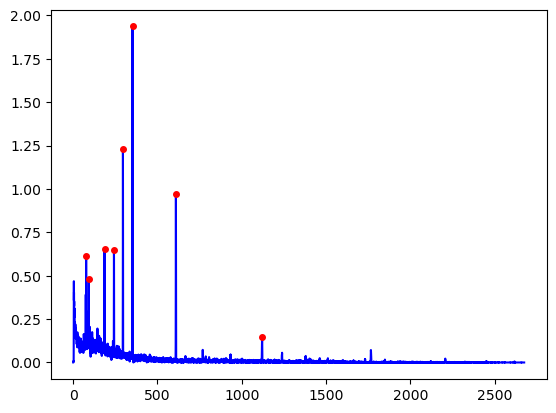

In [ ]:
sample = 'Autunite'  # Replace with your sample name

# Get DataFrames for this sample
spectrum_df = object_dict[sample]
peaks_df = peaks_dict[sample]

peak_energies = peaks_dict[sample]['Energy (keV)'].to_numpy()
peak_counts = peaks_dict[sample]['Normalized Counts per Second'].to_numpy()
isotope_label_positions = {
    f'Bi k$\alpha_1$': (600, 1200),
    '²³⁴Th': (700, 900),
    '²²⁶Ra': (800, 700),
    '²¹⁴Pb': (900, 500),
    '²¹⁴Bi': (1000, 300),
    # Add more as needed
}

plt.plot(object_dict[sample]['Energy (keV)'], object_dict[sample]['Normalized Counts per Second'], label='Spectrum', color='blue')
for i, (x, y) in enumerate(zip(peak_energies, peak_counts)):
        #if y > 0.00:  # Only label significant peaks
            #x_rounded = round(x, 0)
            #offset = 0.015 if i % 2 == 0 else -0.015  # Alternate label positions
            #plt.text(x, y + offset, f"{int(x_rounded)} keV", fontsize=8, ha='center', va='bottom', color='red')
        plt.plot(x, y, 'ro', markersize=4)

for key, data in autunite_peaks_dict:
        plt.text()